### NOTEBOOK - 4.2.2025.

In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [10]:
stokes = fits.open('qs_ph_disk_center_synth.fits')[0].data[:256,:256]
print(stokes.shape)

(256, 256, 4, 201)


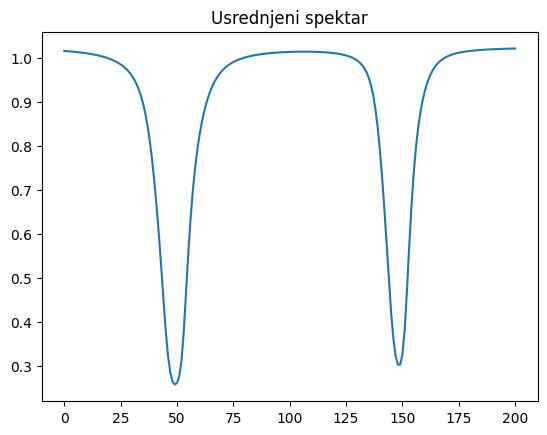

In [12]:
mean_spectrum = np.mean(stokes, axis = (0, 1))
plt.plot(mean_spectrum[0])
plt.title('Usrednjeni spektar')
plt.show()

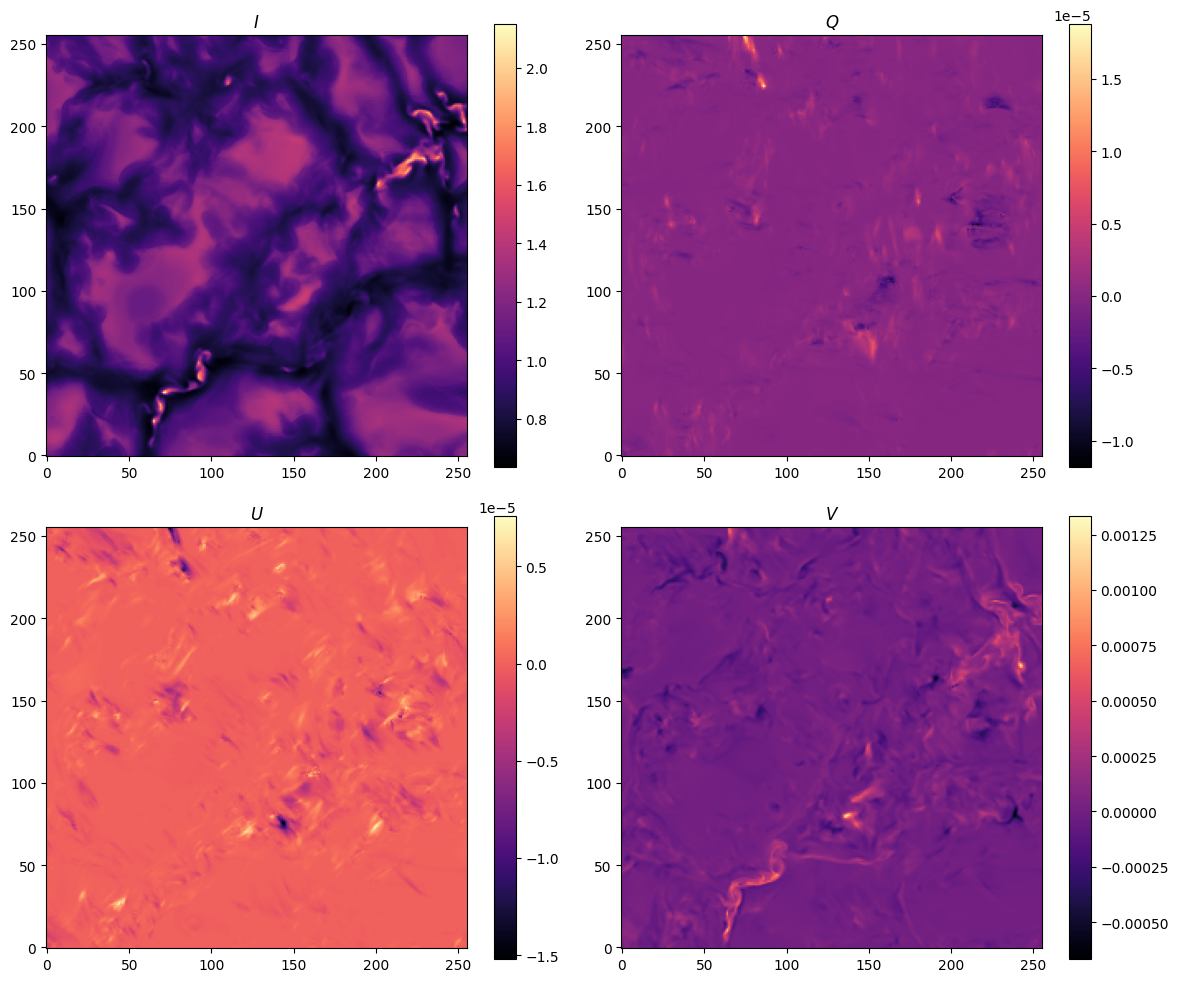

In [14]:
plt.figure(figsize=(12,10))

plt.subplot(221)
plt.imshow(stokes[:, :, 0, 0], origin = 'lower', cmap = 'magma')
plt.colorbar()
plt.title(r'$I$')

plt.subplot(222)
plt.imshow(stokes[:, :, 1, 0], origin = 'lower', cmap = 'magma')
plt.colorbar()
plt.title(r'$Q$')

plt.subplot(223)
plt.imshow(stokes[:, :, 2, 0], origin = 'lower', cmap = 'magma')
plt.colorbar()
plt.title(r'$U$')

plt.subplot(224)
plt.imshow(stokes[:, :, 3, 0], origin = 'lower', cmap = 'magma')
plt.colorbar()
plt.title(r'$V$')

plt.tight_layout()
plt.show()

In [6]:
mean_continuum = np.mean(stokes[:, :, 0, -10:])
stokes = stokes.copy() 
stokes[:, :, 0, :] /= mean_continuum

In [7]:
ll = np.linspace(6301, 6303, 201)

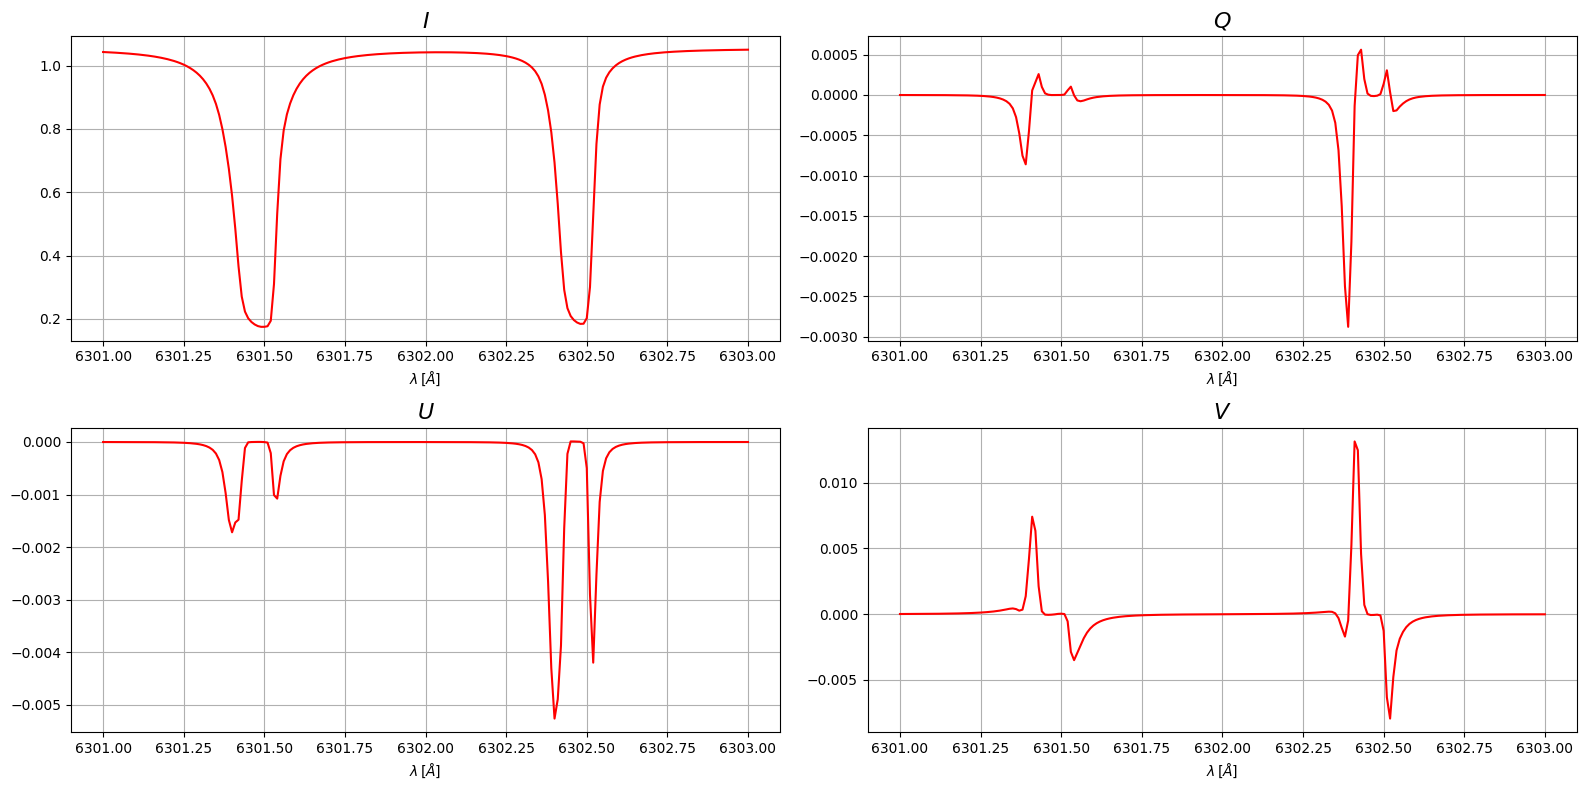

In [8]:
i = 0
j = 0

plt.figure(figsize = [16, 8])

plt.subplot(221)
plt.grid()
plt.plot(ll, stokes[i, j, 0], color='r')
plt.xlabel(r'$\lambda\,[{\AA}]$')
plt.title(r'$I$', fontsize='16' )
plt.subplot(222)
plt.grid()
plt.plot(ll, stokes[i, j, 1], color='r')
plt.xlabel(r'$\lambda\,[{\AA}]$')
plt.title(r'$Q$', fontsize='16')
plt.subplot(223)
plt.grid()
plt.plot(ll, stokes[i, j, 2], color='r')
plt.xlabel(r'$\lambda\,[{\AA}]$')
plt.title(r'$U$', fontsize='16')
plt.subplot(224)
plt.grid()
plt.plot(ll, stokes[i, j, 3], color='r')
plt.xlabel(r'$\lambda\,[{\AA}]$')
plt.title(r'$V$', fontsize='16')

plt.tight_layout()
plt.show()

In [12]:
nx = 1
ny = 1

model_guess = np.float64([500., 0.1, 0.1, 0.0, 0.04, 100, 0.5, 0.1, 1.0])
models_guess  = me.repeat_model(model_guess, nx, ny)
to_fit = stokes[i, j, :, :].reshape(1, 1, 4, 201)
model_out, syn_out, chi2 = me.invert(models_guess, to_fit, noise, nRandom = 20, nIter = 100, chi2_thres = 1.0, verbose = False)

print ('B:', model_out[0,0,0]) # jačina magentnog polja 
print ('inc:', model_out[0,0,1]*180./np.pi) # inklinacija
print ('azi:', model_out[0,0,2]*180./np.pi) # azimut
print ('v:', model_out[0,0,3]) # brzina
print ('Chi-squared = ',chi2) # chi-kvadrat

B: 68.0999415416811
inc: 81.7556153527219
azi: 130.62942090372678
v: -1.2864487720695452
Chi-squared =  [[94.68594126]]


InvertMany: Processed -> 100%


In [13]:
plt.figure(figsize=[16, 8.5])
plt.suptitle('Stokes parameters before and after inversion', fontsize='20')
stokes_p = ['I', 'Q', 'U', 'V']

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(ll, to_fit[0, 0, i], label='Obs')
    plt.plot(ll, syn_out[0, 0, i], label='Fit')
    plt.ylabel(f"${stokes_p[i]}$")
    plt.grid()
    plt.legend()
plt.tight_layout()
plt.show()

In [15]:
regions = [[ll, None]]
lines = [6301, 6302]
me = MilneEddington.MilneEddington(regions, lines, nthreads=8)

pyMilne::dealloc: cleaning-up...


line::line: Initialized [6301.499500] ->  12 Zeeman components
line::line: Initialized [6302.493100] ->   3 Zeeman components


In [17]:
%%time 

i = 0 
j = 0
nx = 256
ny = 256

model_guess = np.float64([500., 0.1, 0.1, 0.0, 0.04, 100, 0.5, 0.1, 1.0])
models_guess  = me.repeat_model(model_guess, nx, ny)

to_fit = stokes[i:i + nx, j:j + ny , :, :].reshape(nx, ny, 4, 201)
model_out, syn_out, chi2 = me.invert(models_guess, to_fit, nRandom = 20, nIter = 50, chi2_thres = 1.0, verbose = False)

CPU times: user 1h 36min 16s, sys: 9.85 s, total: 1h 36min 26s
Wall time: 12min 38s


InvertMany: Processed -> 100%


In [9]:
atmos = fits.open('qs_ph_disk_center.fits')[0].data
print(atmos[0, :, 0, 0])
atmos = fits.open('qs_ph_disk_center.fits')[0].data[:, :, :256, :256]
print('Original shape', atmos.shape)

[ 1.5  1.4  1.3  1.2  1.1  1.   0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2
  0.1  0.  -0.1 -0.2 -0.3 -0.4 -0.5 -0.6 -0.7 -0.8 -0.9 -1.  -1.1 -1.2
 -1.3 -1.4 -1.5 -1.6 -1.7 -1.8 -1.9 -2.  -2.1 -2.2 -2.3 -2.4 -2.5 -2.6
 -2.7 -2.8 -2.9 -3.  -3.1 -3.2 -3.3 -3.4 -3.5 -3.6 -3.7 -3.8 -3.9 -4.
 -4.1 -4.2 -4.3 -4.4 -4.5 -4.6 -4.7 -4.8 -4.9 -5.  -5.1 -5.2 -5.3 -5.4
 -5.5]
Original shape (11, 71, 256, 256)


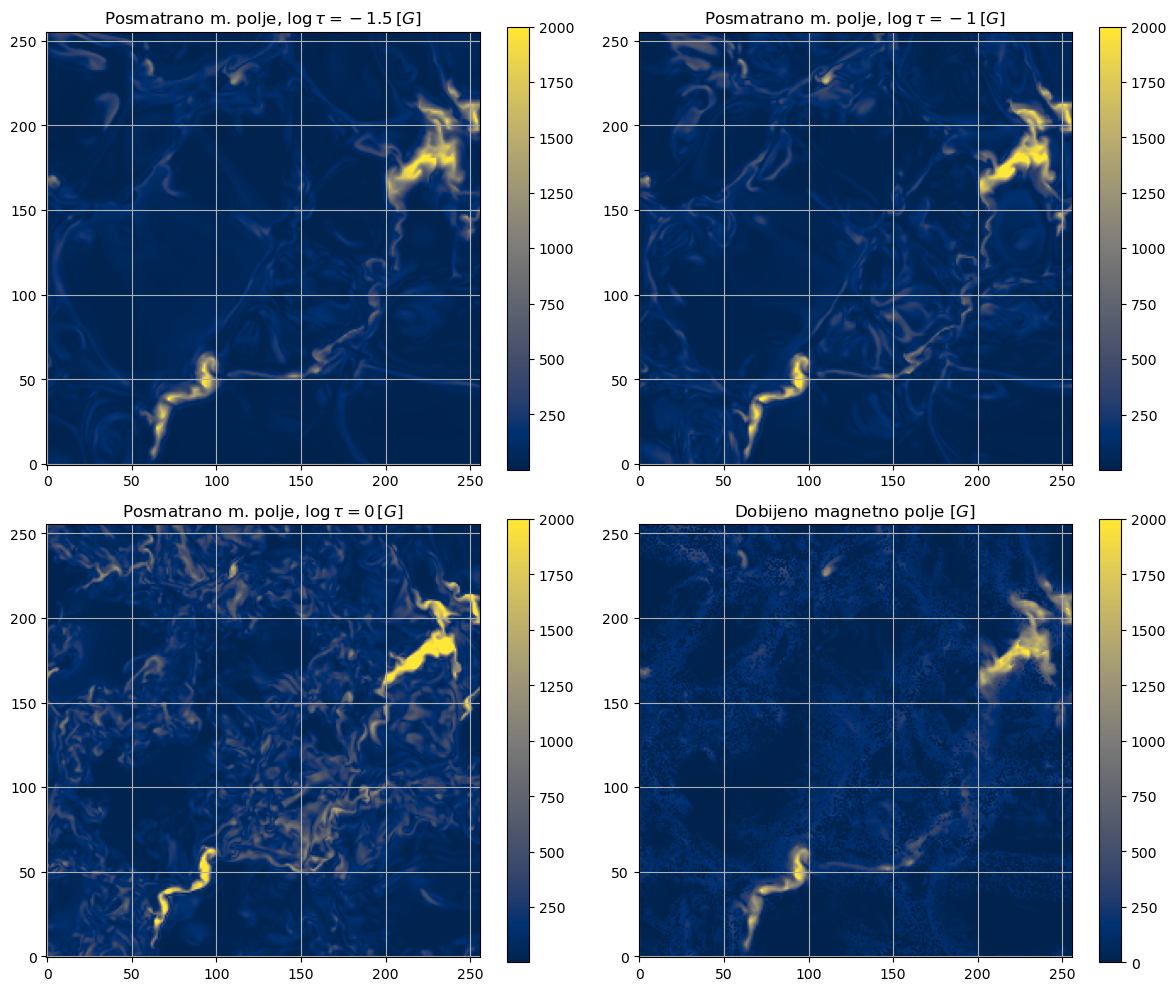

In [31]:
plt.figure(figsize=(12, 10)) 
plt.subplot(2, 2, 1)
plt.grid()
plt.imshow(atmos[4, 30, :, :].T, cmap='cividis', origin='lower', vmax=2000)
plt.title(r'Posmatrano m. polje, $\log{\tau}=-1.5\,[G]$')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.grid()
plt.imshow(atmos[4, 25, :, :].T, cmap='cividis', origin='lower', vmax=2000)
plt.title(r'Posmatrano m. polje, $\log{\tau}=-1\,[G]$')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.grid()
plt.imshow(atmos[4, 15, :, :].T, cmap='cividis', origin='lower', vmax=2000)
plt.title(r'Posmatrano m. polje, $\log{\tau}=0\,[G]$')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.grid()
plt.imshow(model_out[:, :, 0], cmap='cividis', origin='lower', vmax=2000)
plt.title('Dobijeno magnetno polje $[G]$')
plt.colorbar()

plt.tight_layout()
plt.show()

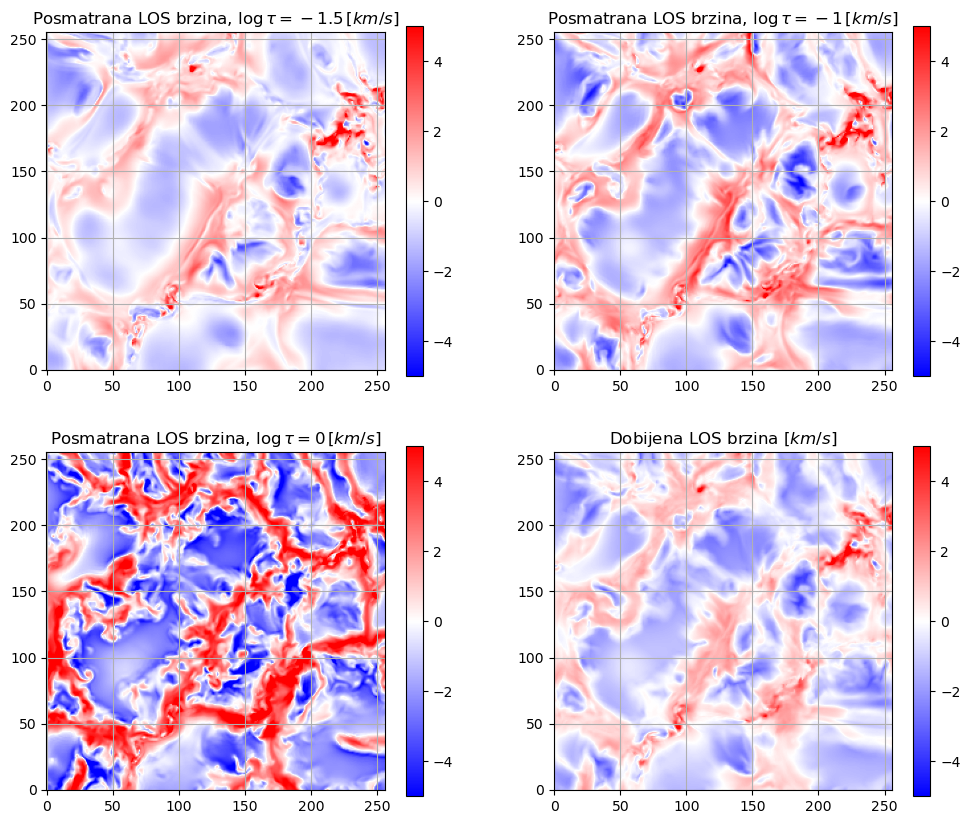

In [32]:
for i in range(atmos.shape[1]):
    atmos[5, i, :, :] /= 100000
    
plt.figure(figsize=(12, 10)) 
plt.subplot(2, 2, 1)
plt.grid()
plt.imshow(atmos[5, 30, :, :].T, cmap='bwr', origin='lower', vmin=-5, vmax=5)
plt.title(r'Posmatrana LOS brzina, $\log{\tau}=-1.5\,[km/s]$')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.grid()
plt.imshow(atmos[5, 25, :, :].T, cmap='bwr', origin='lower', vmin=-5, vmax=5)
plt.title(r'Posmatrana LOS brzina, $\log{\tau}=-1\,[km/s]$')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.grid()
plt.imshow(atmos[5, 15, :, :].T, cmap='bwr', origin='lower', vmin=-5, vmax=5)
plt.title(r'Posmatrana LOS brzina, $\log{\tau}=0\,[km/s]$')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.grid()
plt.imshow(model_out[:, :, 3], cmap='bwr', origin='lower', vmin=-5, vmax=5)
plt.title('Dobijena LOS brzina $[km/s]$')
plt.colorbar()
plt.show()

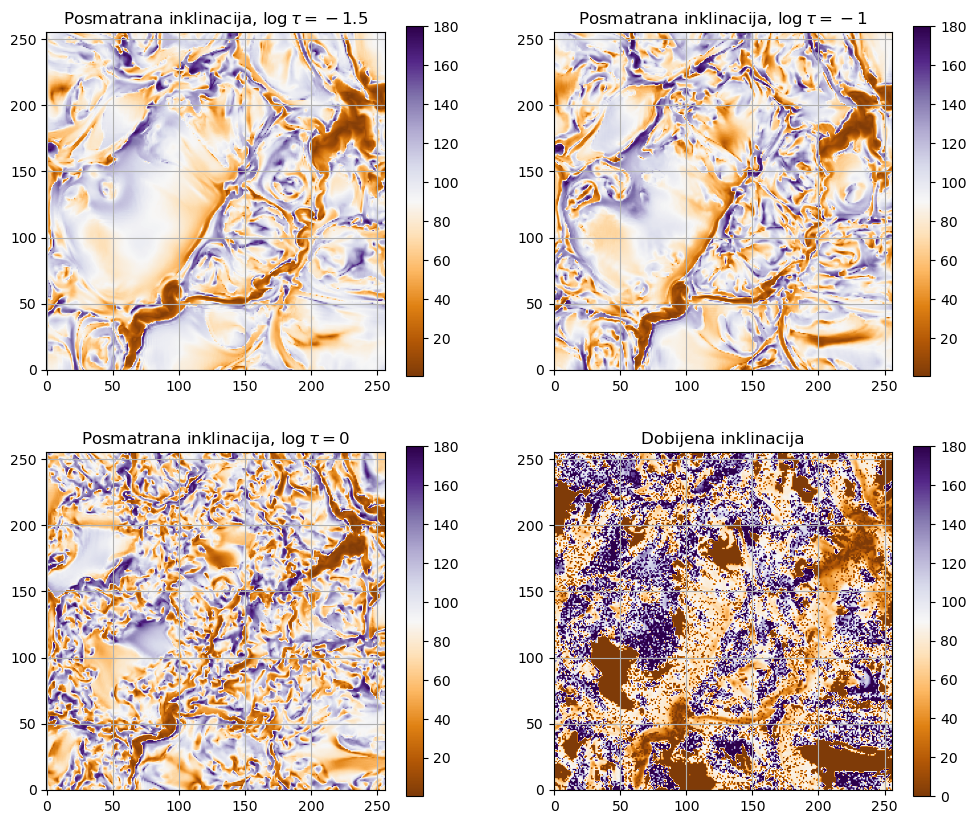

In [33]:
plt.figure(figsize=(12, 10)) 
plt.subplot(2, 2, 1)
plt.grid()
plt.imshow(atmos[6, 30, :, :].T, cmap='PuOr', origin='lower', vmax=180)
plt.title(r'Posmatrana inklinacija, $\log{\tau}=-1.5$')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.grid()
plt.imshow(atmos[6, 25, :, :].T, cmap='PuOr', origin='lower', vmax=180)
plt.title(r'Posmatrana inklinacija, $\log{\tau}=-1$')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.grid()
plt.imshow(atmos[6, 15, :, :].T, cmap='PuOr', origin='lower', vmax=180)
plt.title(r'Posmatrana inklinacija, $\log{\tau}=0$')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.grid()
plt.imshow(model_out[:, :, 1]*180./np.pi, cmap='PuOr', origin='lower', vmax=180)
plt.title('Dobijena inklinacija')
plt.colorbar()
plt.show()

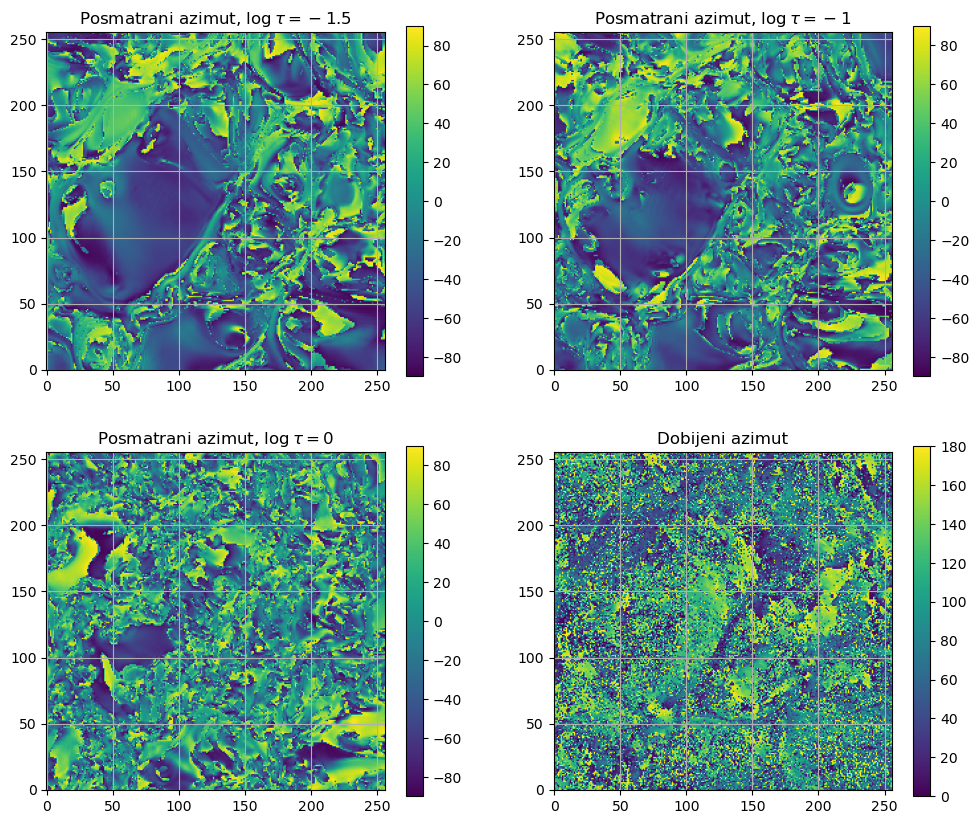

In [34]:
plt.figure(figsize=(12, 10)) 
plt.subplot(2, 2, 1)
plt.grid()
plt.imshow(atmos[7, 30, :, :].T, cmap='viridis', origin='lower')
plt.title(r'Posmatrani azimut, $\log{\tau}=-1.5$')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.grid()
plt.imshow(atmos[7, 25, :, :].T, cmap='viridis', origin='lower')
plt.title(r'Posmatrani azimut, $\log{\tau}=-1$')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.grid()
plt.imshow(atmos[7, 15, :, :].T, cmap='viridis', origin='lower')
plt.title(r'Posmatrani azimut, $\log{\tau}=0$')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.grid()
plt.imshow(model_out[:, :, 2]*180./np.pi, cmap='viridis', origin='lower')
plt.title('Dobijeni azimut')
plt.colorbar()

plt.show()

In [60]:
std_deviations = []

for i in range(len(opt_d)):
    real_field = atmos[4, i, :, :].T
    difference = real_field - model_out[:, :, 0]
    std_deviation = np.std(difference)
    std_deviations.append(std_deviation)

plt.plot(opt_d, std_deviations, color='indianred')
plt.xlabel(r'$\log_{\tau}$')
plt.ylabel(r'$\sigma\, [G]$')
plt.title('Standardna devijacija m. polja')
plt.grid()
plt.show()

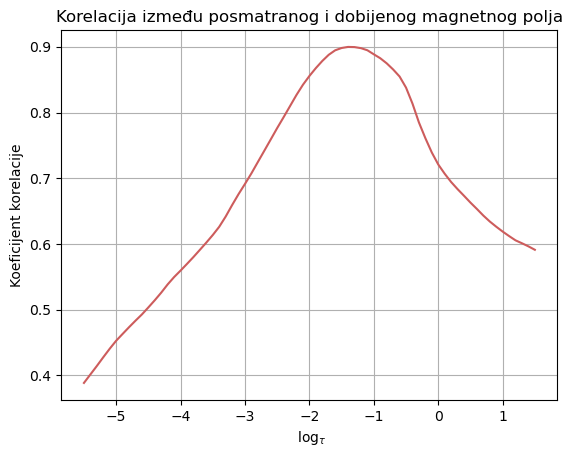

In [62]:
correlation_coefficients = []

for i in range(len(opt_d)):
    real_field = atmos[4, i, :, :].T
    correlation = np.corrcoef(real_field.flatten(), model_out[:, :, 0].flatten())[0, 1]
    correlation_coefficients.append(correlation)

plt.plot(opt_d, correlation_coefficients, color='indianred')
plt.xlabel(r' $\log_{\tau}$')
plt.ylabel('Koeficijent korelacije')
plt.title('Korelacija između posmatranog i dobijenog magnetnog polja')
plt.grid()
plt.show()


Text(0.5, 1.0, 'Dobijeno m. polje [G]')

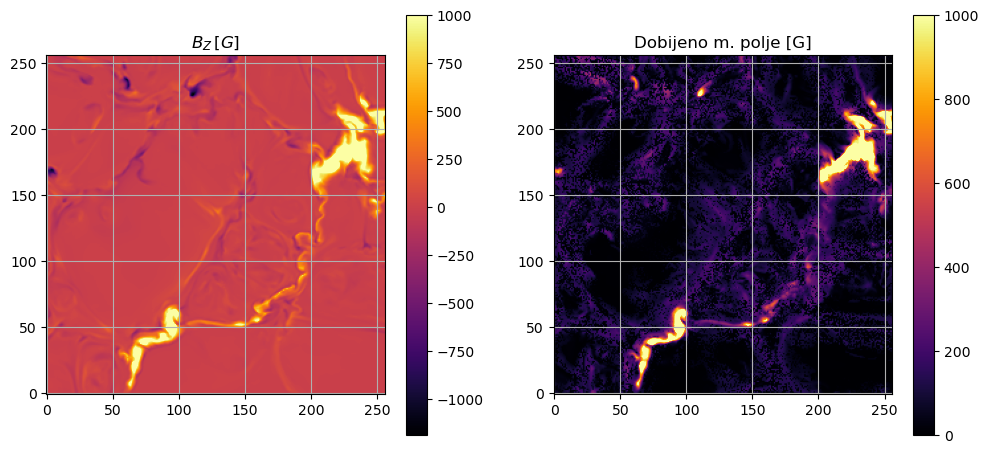

In [63]:
Bz = atmos[4,30,:,:].T * np.cos(np.radians(atmos[6,30,:,:].T))

plt.figure(figsize=(12, 12)) 
plt.subplot(2, 2, 1)
plt.grid()
plt.imshow(Bz, cmap='inferno', origin='lower', vmax=1000)
plt.colorbar()
plt.title(r'$B_Z\,[G]$')

plt.subplot(2, 2, 2)
plt.grid()
plt.imshow(model_out[:, :, 0], cmap='inferno', origin='lower', vmax=1000)
plt.colorbar()
plt.title(r'Dobijeno m. polje [G]')

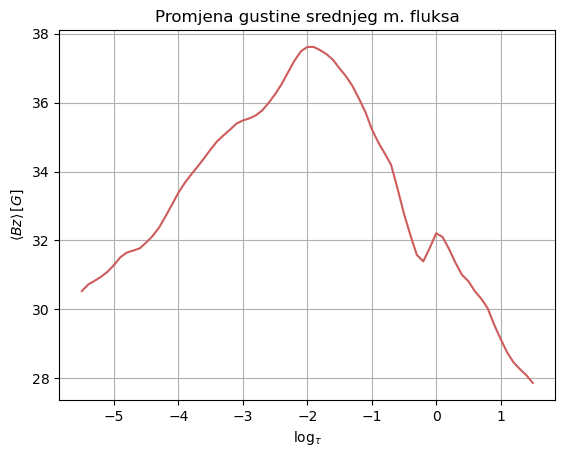

In [154]:
mean_Bz_values = []

for i in range(len(opt_d)):
    Bz = atmos[4, i, :, :].T * np.cos(np.radians(atmos[6, i, :, :].T))  # Vertikalna komponenta magnetnog polja
    mean_Bz = np.mean(Bz)  # Računanje srednje vrednosti komponente Bz
    mean_Bz_values.append(mean_Bz)

plt.plot(opt_d, mean_Bz_values, color='indianred')
plt.xlabel(r'$\log_{\tau}$')
plt.ylabel(r'$\langle Bz\rangle\,[G]$')
plt.title('Promjena gustine srednjeg m. fluksa')
plt.grid(True)
plt.show()

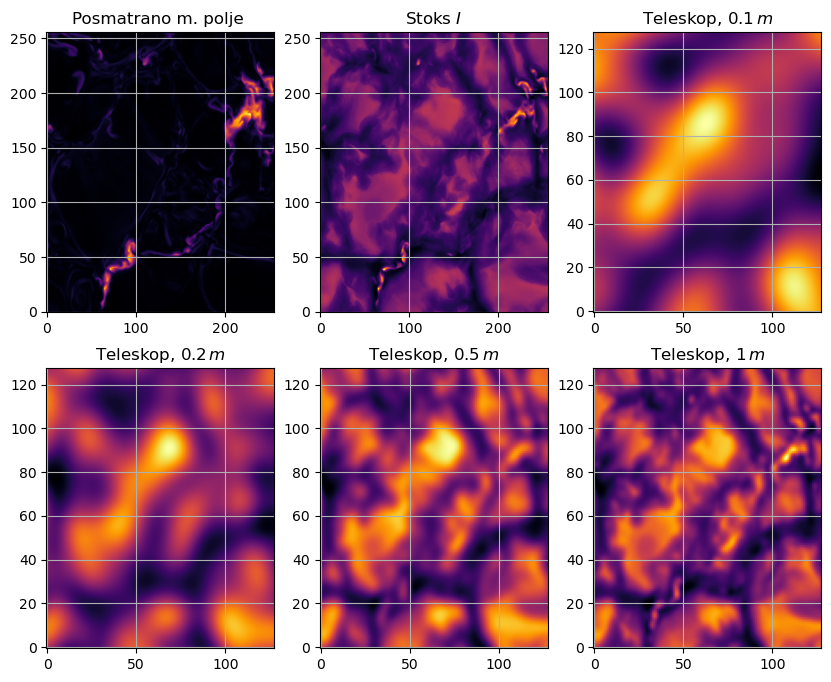

<Figure size 640x480 with 0 Axes>

In [167]:
plt.figure(figsize=(10, 8)) 

plt.subplot(2, 3, 1)
plt.imshow(atmos[4, 30, :, :].T, origin='lower', cmap='inferno', aspect='auto')
plt.title(r'Posmatrano m. polje ')
plt.grid()

plt.subplot(2, 3, 2)
plt.imshow(stokes[:, :, 0, 0], origin='lower', cmap='inferno', aspect='auto')
plt.title(r'Stoks $I$')
plt.grid()

plt.subplot(2, 3, 3)
plt.imshow(point_one[:, :, 0, 0], origin='lower', cmap='inferno', aspect='auto')
plt.title(r'Teleskop, $0.1\,m$')
plt.grid()

plt.subplot(2, 3, 4)
plt.imshow(point_two[:, :, 0, 0], origin='lower', cmap='inferno', aspect='auto')
plt.title(r'Teleskop, $0.2\,m$')
plt.grid()

plt.subplot(2, 3, 5)
plt.imshow(point_five[:, :, 0, 0], origin='lower', cmap='inferno', aspect='auto')
plt.title(r'Teleskop, $0.5\,m$')
plt.grid()

plt.subplot(2, 3, 6)
plt.imshow(one[:, :, 0, 0], origin='lower', cmap='inferno', aspect='auto')
plt.title(r'Teleskop, $1\,m$')
plt.grid()
plt.show()
plt.tight_layout()

[34.6183689758527, 33.19244685179831, 28.099299845140976, 17.89758891470197, 12.925797825363798]


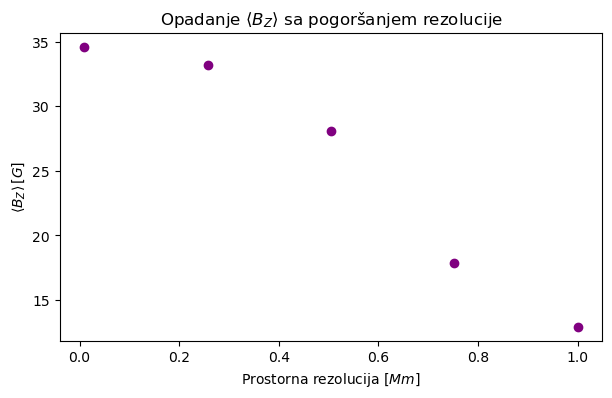

In [162]:
mean_values = [np.mean(B_los), np.mean(B_los_1), np.mean(B_los_05), np.mean(B_los_02), np.mean(B_los_01)]
print(mean_values)
resolutions = np.linspace(0.01, 1, 5)

plt.figure(figsize=(7, 4))
plt.scatter(resolutions, mean_values, color='purple')

plt.xlabel(r'Prostorna rezolucija $[Mm]$')
plt.ylabel(r'$\langle B_Z\rangle\,[G]$')
plt.title(r'Opadanje $\langle B_Z\rangle$ sa pogoršanjem rezolucije')
plt.show()